<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Brutyan%20Ruben/2_1_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C(%D1%81_VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ПОДГОТОВКА - train_val_test

## Создание папок

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Папки для 2-х классов цветных изображений (0 - комбинированные, 1 - металл, 2 - пластик)

In [ ]:
!pwd   # проверяем текущее местоположение

/content


In [ ]:
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/'           # создаём папку Dataset
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/train'      # создаём папку train - обучающие фото
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/test'       # создаём папку test - тестовые фото

## Статистика (кол-во)

Количество и метки классов. Названия файлов.

In [ ]:
# Для работы с файлами
import os

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/drive/MyDrive/НетОптик/Dataset/train'
print('Список папок:', os.listdir(IMAGE_PATH), '\n')

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}')
print(f'Метки классов: {CLASS_LIST}\n')

# Получения списка файлов для каждого класса
for name_file in CLASS_LIST:
  t = os.listdir(f'{IMAGE_PATH}/{name_file}/')
  print(f'В папке "{name_file}" всего: {len(t)} картинок:\n{t}\n')

Список папок: ['class_1p', 'class_2m'] 

Количество классов: 2
Метки классов: ['class_1p', 'class_2m']

В папке "class_1p" всего: 400 картинок:
['baldessarini-b5103-b-s2-2 (1).jpg', 'baldessarini-b5103-b-s2-1 (2).jpg', 'carrera-ca6167-t29-s2-2 (1).jpg', 'carrera-ca6172-87u-s2-2 (5).jpg', 'carrera-ca6172-87u-s2-2 (6).jpg', 'carrera-ca6192-8c0-s2-2 (5).jpg', 'carrera-ca6609-dhr-s2-2 (1).jpg', 'carrera-ca6167-t29-s2-1 (2).jpg', 'carrera-ca6609-dhr-s2-1 (2).jpg', 'giorgio-armani-ga889-807-s2-2 (2).jpg', 'giorgio-armani-ga936-086-s2-2 (2).jpg', 'giorgio-armani-ga936-086-s2-1 (3).jpg', 'giorgio-armani-ga936-807-s2-2 (3).jpg', 'giorgio-armani-ga936-807-s2-1 (4).jpg', 'giorgio-armani-ga938-807-s2-2 (2).jpg', 'giorgio-armani-ga938-807-s2-1 (3).jpg', 'giorgio-armani-ga941-086-s2-2 (2).jpg', 'giorgio-armani-ga941-086-s2-1 (3).jpg', 'giorgio-armani-ga965-7c5-s2-2 (2).jpg', 'giorgio-armani-ga965-7c5-s2-1 (3).jpg', 'giorgio-armani-ga970-807-s2-2 (2).jpg', 'giorgio-armani-ga970-807-s2-1 (3).jpg', 'gi

## Вывод изображений

Выводим по одному случайному изображению из каждого класса

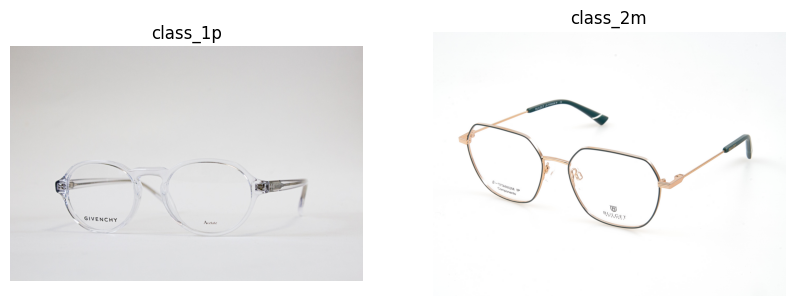

In [ ]:
import matplotlib.pyplot as plt
import random
# методы для отрисовки изображений
from PIL import Image

# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    glass_path = f'{IMAGE_PATH}/{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = glass_path + random.choice(os.listdir(glass_path))

    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

# МОДЕЛЬ 1

## Загрузка библиотек для модели

In [ ]:
from tensorflow.keras.models import Sequential # загружаем абстрактный класс базовой модели сети от кераса
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Flatten  # загружаем слои(нормализации, регуляризации и т.д)
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils

# ДАТАСЕТ для обучения c ImageDataGenerator

ImageDataGenerator - это класс в библиотеке Keras, который используется для различных преобразований к входным изображениям (увеличения, повороты, изменения размера, отражения и изменения контраста) в процессе обучения модели глубокого обучения.

## Начальные параметры

Параметры для ImageDataGenerator

In [ ]:
batch_size = 32
img_height = 675
img_width = 450
data_dir = '/content/drive/MyDrive/НетОптик/Dataset/train'
test_dir = '/content/drive/MyDrive/НетОптик/Dataset/test'
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# выбираем вид backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)

## Генератор изображений

Генератор, который будет случайно поворачивать изображение до 12 градусов, случайно сдвигает его по горизонтали и вертикали на 5 пикселей, укрупнять или уменьшать его на 20% и генерировать изображения в выборки в соотношении 80% обучающая, 20% проверочная.

In [ ]:
# загружаем модуль ImageDataGenerator из библиотеки tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Создаем генератор изображений с аугментацией данных
datagen = ImageDataGenerator(
    rotation_range=12,            # случайные повороты в диапазоне [-12, 12] градусов
    width_shift_range=5.0,        # случайное горизонтальное смещение в диапазоне [-5.0, 5.0]
    height_shift_range=5.0 ,      # случайное вертикальное смещение в диапазоне [-5.0, 5.0]
    zoom_range=0.2,               # случайное масштабирование в диапазоне [0.8, 1.2]
    validation_split=0.2)         # доля отводимая на валидацию от всех фото для обучения

Из этого генератора создадим экземпляры обучающего датагенератора train_generator и проверочного val_generator.

Здесь используем datagen.flow_from_directory так как изображения у нас хранятся на диске. Если изображения уже подгружены в рабочую среду то можно использовать datagen.flow(x_train, y_train, batch_size=32,
         subset='training')

## Train выборка

Генератор данных для обучения на основе изображений из каталога

In [ ]:
# Загрузка и подготовка изображений
train_generator = datagen.flow_from_directory(
    data_dir,                            # Путь ко всей выборке
    target_size=(img_width, img_height), # Размер изображений
    batch_size=batch_size,               # Размер batch_size
    class_mode='binary',                 # Тип выборки (бывает и категориальный 'categorical')
    shuffle=False,                       # Перемешивание выборки
    subset='training'                    # устанавливаем как набор для обучения
)

Found 640 images belonging to 2 classes.


## Val выборка

Генератор данных для проверки на основе изображений из каталога

In [ ]:
# Загрузка и подготовка изображений
val_generator = datagen.flow_from_directory(
    data_dir,                            # Путь ко всей выборке
    target_size=(img_width, img_height), # Размер изображений
    batch_size=batch_size,               # Размер batch_size
    class_mode='binary',                 # Тип выборки (бывает и категориальный 'categorical')
    shuffle=False,                       # Перемешивание выборки
    subset='validation'                  # устанавливаем как набор для обучения
)

Found 160 images belonging to 2 classes.


## Test выборка

Генератор данных для тестирования на основе изображений из каталога

In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 36 images belonging to 2 classes.


Пример: Сгенерированное фото от train_generator

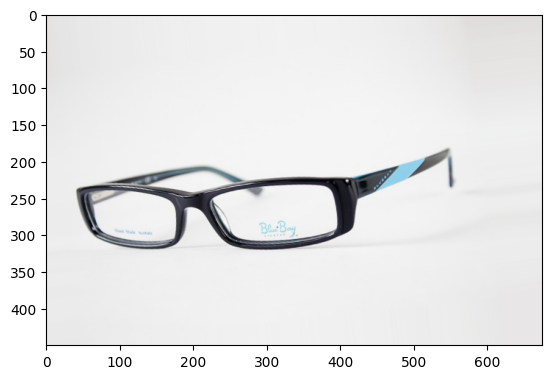

In [ ]:
for  imgs, labels in train_generator:
  plt.imshow(imgs[0].astype("uint8"))
  plt.show()
  break

Создаем сверточную нейронную сеть

## Архитектура сети

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Компилируем нейронную сеть

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Граф модели

In [ ]:
# Вывод суммарной информации о модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 673, 448, 32)      896       
                                                                 
 activation (Activation)     (None, 673, 448, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 336, 224, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 334, 222, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 334, 222, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 167, 111, 32)     0         
 2D)                                                    

## Обучение модели

Обучаем модель с использованием генераторов

*   train_generator - генератор данных для обучения
*   validation_data - генератор данных для проверки

**steps_per_epoch** - сколько раз нужно обратиться модели к генератору за получением новых данных. Может быть полезным когда данных на диске у вас очень много и простая передача по bath_size примеров может длиться очень долго*

In [ ]:
# Обучение модели с использованием генератора изображений
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs=5,
                              verbose= 1)

<ipython-input-17-8b843aeb6644>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5
20/20 [==============================] - 87s 4s/step - loss: 1472.6072 - accuracy: 0.3828 - val_loss: 13.8766 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 70s 4s/step - loss: 8.2514 - accuracy: 0.4078 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 70s 4s/step - loss: 14.6887 - accuracy: 0.5875 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 71s 4s/step - loss: 2.1640 - accuracy: 0.5000 - val_loss: 0.6523 - val_accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 76s 4s/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Оцениваем качество работы сети с помощью генератора

In [ ]:
test_samples = 36

In [ ]:
scores = model.evaluate_generator(test_generator, test_samples // batch_size)
print("\nTest_accuracy на тестовых данных: %.2f%%" % (scores[1]*100))

<ipython-input-23-1b0be34f2d31>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, test_samples // batch_size)


Test_accuracy на тестовых данных: 50.00%


# Перенос обучения
Предварително обученные сети для обработки изображений:
1. VGG16 (Very Deep Convolutional Networks for Large-Scale Image Recognition)
2. ResNet (Residual Neural Network)
3. InceptionNet (Inception V1, V2, V3, V4, Inception-ResNet)
4. MobileNet (Efficient Convolutional Neural Networks for Mobile Vision Applications)
5. DenseNet (Densely Connected Convolutional Networks)
6. AlexNet (Convolutional Neural Networks for Image Classification)
7. Xception (Extreme Inception)
8. EfficientNet (Efficient Convolutional Neural Networks)

 которые можно использовать в задачах классификации, распознавания объектов и других задачах обработки изображений.

## Загрузка библиотек для модели

In [ ]:
from keras.applications import VGG16

# # Загрузка модели VGG16 без весов ImageNet
# model = VGG16(weights=None, include_top=True)

## Обученная VGG16

Загружаем предварительно обученную нейронную сеть VGG16

In [ ]:
# Загружаем предварительно обученную нейронную сеть
vgg16_net = VGG16(weights='imagenet',                         # признаки из набора данных "ImageNet"
                  include_top=False,                          # отключаем часть "классификация", оставляем только "сверточную часть"
                  input_shape=(img_width, img_height, 3))     # размер тензора входных изображений

# "Замораживаем" веса предварительно обученной нейронной сети VGG16 (сверточную часть обучать не будем)
vgg16_net.trainable = False

In [ ]:
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 450, 675, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 450, 675, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 450, 675, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 225, 337, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 225, 337, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 225, 337, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 112, 168, 128)     0     

*   Кол-во параметров:  14,714,688
*   Кол-во параметров обучаем: 0
*   Кол-во параметров НЕ обучаем: 14,714,688


## Составная сеть

Создаем составную нейронную сеть на основе VGG16

In [ ]:
model = Sequential()
# Добавляем в модель сеть VGG16 вместо слоя
model.add(vgg16_net)
# Добавляем слои, для классификации
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 14, 21, 512)       14714688  
                                                                 
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               38535424  
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
 activation_13 (Activation)  (None, 1)                

*   Кол-во параметров:  53,250,369 (14,714,688 + 38,535,424 + 257)
*   Кол-во параметров обучаем: 38,535,681 (38,535,424 + 257)
*   Кол-во параметров НЕ обучаем: 14,714,688

Компилируем составную нейронную сеть

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),         # должна быть низкой, чтобы алгоритм обучения сошелся
              metrics=['accuracy'])

Обучаем составную модель с использованием генераторов fit_generator

*   train_generator - генератор данных для обучения
*   validation_data - генератор данных для проверки

In [ ]:
# Обучение модели с использованием генератора изображений
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs=2,
                              verbose= 1)

<ipython-input-40-d93c6530eb09>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/2
20/20 [==============================] - 79s 4s/step - loss: 3.9217 - accuracy: 0.6328 - val_loss: 1.6166 - val_accuracy: 0.8313
Epoch 2/2
20/20 [==============================] - 77s 4s/step - loss: 0.7741 - accuracy: 0.9016 - val_loss: 0.2219 - val_accuracy: 0.9563


Оцениваем качество работы сети с помощью генератора

In [ ]:
scores = model.evaluate_generator(test_generator, test_samples // batch_size)
print("\nTest_accuracy на тестовых данных: %.2f%%" % (scores[1]*100))

<ipython-input-43-19162f221ce5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, test_samples // batch_size)



Test_accuracy на тестовых данных: 100.00%


# Сохранение модели

In [ ]:
print('Сохраняем сеть')
# Сохраняем сеть для последующего использования
# генерируем описание модели в формате json
model_json = model.to_json()
json_file = open("/content/drive/MyDrive/НетОптик/Таблицы_выход/net_optic.json", "w")
# Записываем архитектуру сети в файл json
json_file.write(model_json)
json_file.close()
# Записываем данные о весах в файл h5
model.save_weights("/content/drive/MyDrive/НетОптик/Таблицы_выход/net_optic.h5")
print('Сохранение сети завершено')

Сохраняем сеть
Сохранение сети завершено


In [ ]:
from tensorflow.python.keras.models import Model, model_from_json

print('Загружаем сеть')
# Загружаем данные об архитектуре сети из файла json
json_file = open("/content/drive/MyDrive/НетОптик/Таблицы_выход/net_optic.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("/content/drive/MyDrive/НетОптик/Таблицы_выход/net_optic.h5")
print('Загрузка сети завершена')